# Processing the Linguistic data

This uses the "OCSEAN_language_collection_overview_April_25.xlsx" data and CleanedData folder provided by Monika.


## Preamble

We import some useful libraries that we will use further down.

In [177]:
import pandas as pd # Pandas is the most common "data frame", i.e. Excel-sheet reader
import os # os = operating system; we use this for accessing files on the computer

In [178]:
os.getcwd() # Which directory are we in? It should contain the file and folder described above inside it.

'/Users/madjl/GoogleDrive/University/OCSEAN-2025/RESEARCH'

## Reading and checking data

We will read the main excel overview file using pandas. It is a simple call, but to make life easier we will choose not to treat missing (empty) cells specially; they are just an empty string. This is a bad idea for numerical values but can be useful for strings.

In [224]:
collectionsheet=pd.read_excel("OCSEAN_language_collection_overview_April_25.xlsx",na_filter=False)  
# We don't detect NA values, and instead treat them as they are (empty strings)

In [225]:
collectionsheet.head() # Look at the top few values

,Language_BasedOnMasterSheet,ISO code (from Original_FileName),COUNTRY,LocalWordsPresent,QC_done,AddedToTheUnitedLanguagesMasterFile,Comment,Separator,Mismatches_Eng,Mismatches_IndoOrTaga,Original_FileName,QC_FileName,Google Map Coordinate
0,Abui Bunggeta,ABZ,Indonesia,604,Yes,Yes,Some English and or Indonesian words in this l...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240605-BUNGGETA_WORDLIST.xlsx,OCSEAN-ABZ_20240605-BUNGGETA_WORDLIST_PostQC.xlsx,
1,Abui Kilakawada,ABZ,Indonesia,604,Yes,Yes,English and English Elicitation notes complete...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240606-KILAKAWADA_WORDLIST.xlsx,OCSEAN-ABZ_20240606-KILAKAWADA_WORDLIST_PostQC...,
2,Abui Mobyetang,ABZ,Indonesia,602,Yes,Yes,English Elicitation = English actually. Some E...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240610-MOBYETANG_WORDLIST.xlsx,OCSEAN-ABZ_20240610-MOBYETANG_WORDLIST_PostQC....,
3,Abui Pelman,ABZ,Indonesia,602,Yes,Yes,English Elicitation = English actually. Some E...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240610-PELMAN_WORDLIST.xlsx,OCSEAN-ABZ_20240610-PELMAN_WORDLIST_PostQC.xlsx,
4,Abui Takalelang,ABZ,Indonesia,293,NO,NO,There is no orthography. Only few hundred IPAs...,,0,0,OCSEAN-ABZ_20220715-TAKALELANG_WORDLIST.xlsx,NA,


Our first serious code. Here we are going to add a new column called "Used" that is 'True' if we find a QC'd file, or 'False' if we don't.

Note that if you uncomment the "print" statements, you will get a long description of which files exist. If we'd kept NA values, we'd have to treat them specially here.

In [252]:
collectionsheet["Used"] = False
for id in collectionsheet.index:
    f=collectionsheet.at[id,"QC_FileName"]
    fullfile=os.path.join("CleanedFiles",f)
    if(os.path.isfile(fullfile)):
#        print(id,":", fullfile,"exists")
        collectionsheet.at[id, "Used"]=True
#    else:
#        print(id,":", fullfile,"missing")

In [253]:
# How many from each country?
collectionsheet["COUNTRY"].value_counts()

COUNTRY
the Phillipines     73
Indonesia           48
Papua New Guinea     1
Name: count, dtype: int64

Now we do some checking. How many values do we get to Use, and how many are missing?

In [254]:
collectionsheet["Used"].value_counts()

Used
True     74
False    48
Name: count, dtype: int64

In [255]:
# If we had kept na values, we could count them like this
pd.isna(collectionsheet["QC_FileName"]).value_counts()

QC_FileName
False    122
Name: count, dtype: int64

In [256]:
# This is a dataframe of the languages we cannot find a file for
brokenrecords=(collectionsheet["Used"]==False)
brokensheet=collectionsheet.loc[brokenrecords,:]
brokensheet.head()

,Language_BasedOnMasterSheet,ISO code (from Original_FileName),COUNTRY,LocalWordsPresent,QC_done,AddedToTheUnitedLanguagesMasterFile,Comment,Separator,Mismatches_Eng,Mismatches_IndoOrTaga,Original_FileName,QC_FileName,Google Map Coordinate,Used
4,Abui Takalelang,ABZ,Indonesia,293,NO,NO,There is no orthography. Only few hundred IPAs...,,0,0,OCSEAN-ABZ_20220715-TAKALELANG_WORDLIST.xlsx,NA,,False
5,Abui Takalelang,NA,Indonesia,NA,NA,NA,NA,NA,NA,NA,NA,NA,,False
6,Abui Takalelang,NA,Indonesia,NA,NA,NA,NA,NA,NA,NA,NA,NA,,False
8,Adang,NA,Indonesia,NA,NA,NA,NA,NA,NA,NA,NA,NA,,False
9,Agta,AGT,the Phillipines,952,"Yes, but not ideal",Yes,There seems to be an issue with the removal of...,", and /",13,65,OCSEAN-AGT_20240124-WORDLIST_1TO1228.xlsx,OCSEAN-AGT_20240124-WORDLIST_1TO1228_PostQC.xlsx,,False


In [278]:
# This is a dataframe of the languages we CAN find a file for
cleansheet=collectionsheet.copy().loc[(collectionsheet["Used"]==True),:]
cleansheet["Language_BasedOnMasterSheet"] = cleansheet["Language_BasedOnMasterSheet"].apply(lambda x: x.strip())
cleansheet.head()

,Language_BasedOnMasterSheet,ISO code (from Original_FileName),COUNTRY,LocalWordsPresent,QC_done,AddedToTheUnitedLanguagesMasterFile,Comment,Separator,Mismatches_Eng,Mismatches_IndoOrTaga,Original_FileName,QC_FileName,Google Map Coordinate,Used
0,Abui Bunggeta,ABZ,Indonesia,604,Yes,Yes,Some English and or Indonesian words in this l...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240605-BUNGGETA_WORDLIST.xlsx,OCSEAN-ABZ_20240605-BUNGGETA_WORDLIST_PostQC.xlsx,,True
1,Abui Kilakawada,ABZ,Indonesia,604,Yes,Yes,English and English Elicitation notes complete...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240606-KILAKAWADA_WORDLIST.xlsx,OCSEAN-ABZ_20240606-KILAKAWADA_WORDLIST_PostQC...,,True
2,Abui Mobyetang,ABZ,Indonesia,602,Yes,Yes,English Elicitation = English actually. Some E...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240610-MOBYETANG_WORDLIST.xlsx,OCSEAN-ABZ_20240610-MOBYETANG_WORDLIST_PostQC....,,True
3,Abui Pelman,ABZ,Indonesia,602,Yes,Yes,English Elicitation = English actually. Some E...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240610-PELMAN_WORDLIST.xlsx,OCSEAN-ABZ_20240610-PELMAN_WORDLIST_PostQC.xlsx,,True
7,Adang,ADN,Indonesia,234,Yes,Yes,The formatting of indonesian words in this lan...,",",NA,67,OCSEAN-ADN_20230427-WORDLIST.xlsx,OCSEAN-ADN_20230427-WORDLIST_PostQC.xlsx,,True


### Reading all of the individual files

We have made a list of files that exist, so now we will load each one.

We are using 'dictionaries' here. These are lists that you access not in a "spreadsheet" format, but by name. We don't need to have them be the same "shape" which is very useful in this case, as we don't want to assume each spreadsheet has th same columns.

Because of this, we are particularly interested in which columns are present in a dataset, so we'll list those in a special dictionary.

In [279]:
collection = {}
colnames={}
for id in cleansheet.index:
    ## If there is an error its helpful to print which files we are reading when the error happens
    # print("... Reading",id,": ",f)
    f=cleansheet.at[id,"QC_FileName"]
    fullfile=os.path.join("CleanedFiles",f)
    langname = cleansheet.at[id,"Language_BasedOnMasterSheet"]
    collection[langname]=pd.read_excel(fullfile)
    colnames[langname]=list(collection[langname].columns.values)
    # print("Read",id,": ",f,"successfully")

We will now make a new column in the dataframe based on whether there is a column called 'IPA'.

This is a tricky bit f code. We have to do two loops, one over each file (the 'keys' of colnames) and again over all of the actual names found to check whether any are 'IPA'.

In [280]:
cleansheet.loc[:,"Has_IPA"] = [(any(x == 'IPA' for x in colnames[a])) for a in colnames.keys()]

In [281]:
cleansheet.loc[:,"Has_English"] = [(any(x == 'English' for x in colnames[a])) for a in colnames.keys()]

In [282]:
cleansheet["Has_IPA"].value_counts()

Has_IPA
False    65
True      9
Name: count, dtype: int64

In [283]:
cleansheet["Has_English"].value_counts()

Has_English
True     68
False     6
Name: count, dtype: int64

We'll make two sheets, based on whether the spreadsheet has an 'IPA' column.

In [284]:
noenglishsheet=cleansheet.loc[~cleansheet["Has_English"],:]
noenglishsheet["Language_BasedOnMasterSheet"]

7            Adang
14         Alurung
65           Kelon
67            Klon
74           Mauta
85    Reta Ternate
Name: Language_BasedOnMasterSheet, dtype: object

In [302]:
englishsheet=cleansheet.copy().loc[cleansheet["Has_English"],:]
englishsheet["Language_BasedOnMasterSheet"]

0        Abui Bunggeta
1      Abui Kilakawada
2       Abui Mobyetang
3          Abui Pelman
10       Agusan Manobo
            ...       
111             Tausug
112              Tboli
116           Uab Meto
119              Waray
121              Yakan
Name: Language_BasedOnMasterSheet, Length: 68, dtype: object

Lets check that all of our "good" data has English as a column?

In [304]:
collection['Hiligaynon_20220813']

,English,Tagalog,Hiligaynon_20220813,IPA
0,world,mundo,kalibutan,ka.li.bu.tan
1,Earth,daigdig,kalibutan,ka.li.bu.tan
2,"land, earth, soil",lupa',duta,"du.ta, bɑ.las"
3,"land, earth, soil",lupa',balas,"du.ta, bɑ.las"
4,"dust, fine earth",alikabok,yab-ok,yab.ɔʔ
...,...,...,...,...
1272,imam,imam,imam,NaN
1273,bless,pagmano,bendisyon,NaN
1274,redeem,tubos,NaN,NaN
1275,curse,isumpa,sumpa,NaN


It does, so we can now start with the core goal: a 'join' operation on the data.

## Merging the datasets

We will only merge the 'IPA' column, based on 'English' as a key.

In [306]:
from thefuzz import process
englishsheet["Language_AsInFile"]=""
for id in englishsheet.index:
    language_name=englishsheet.at[id,"Language_BasedOnMasterSheet"]
    englishsheet.at[id,"Language_AsInFile"]=process.extractOne(language_name, colnames[language_name])[0]

In [318]:
joinable_collection = {} # This is an empty dictionary: we'll populate it from the collection dictionary

# Now iterate over only those languages that we have data for:
for id in englishsheet.index:
#    print(language_name,englishsheet.at[id,"Language_AsInFile"],englishsheet.at[id,"QC_FileName"])
    language_name=englishsheet.at[id,"Language_BasedOnMasterSheet"]
    # First, get just the columns we want. Note we have to copy the dataframe
    simple_data=collection[language_name].copy()[["English",englishsheet.at[id,"Language_AsInFile"]]] 
    # Add the Language as a new column
    simple_data["Language"]=englishsheet.at[id,"Language_AsInFile"]
    # Rename the columns to English
    simple_data = simple_data.rename(columns={englishsheet.at[id,"Language_AsInFile"]: 'Word', "English": 'Concept'})
    # Remove any rows that have NA as the in the "Concept" or "Word" (was the original language)
    simple_data=simple_data.dropna()
    joinable_collection[language_name]=simple_data # Add the new data frame to the dictionary of all data frames

In [322]:
joined_data = pd.concat(joinable_collection.values(), axis=0, ignore_index=True)

In [328]:
concept_counts = joined_data["Concept"].value_counts()
language_counts = joined_data["Language"].value_counts()
concept_counts

Concept
smell                                            210
child                                            128
fly                                              125
bathe                                            124
short                                            124
                                                ... 
Comb one's hair                                    1
Comb                                               1
Earring                                            1
Bead                                               1
rough bamboo,giant bamboo(Dendrocalamusasper)      1
Name: count, Length: 3092, dtype: int64

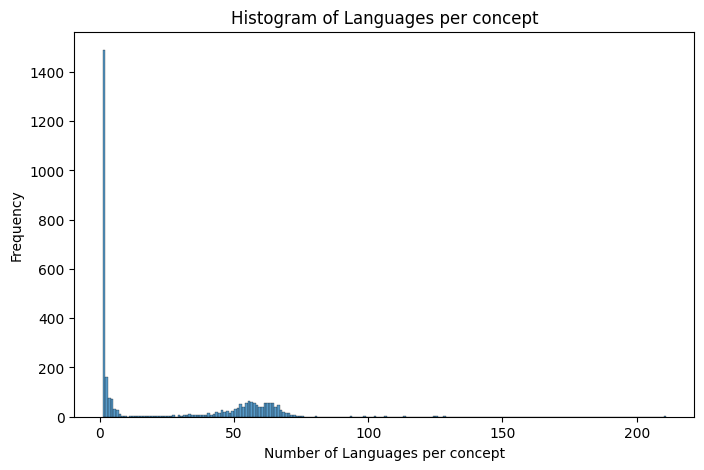

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(concept_counts, bins=range(concept_counts.min(), concept_counts.max() + 2), kde=False, edgecolor='black')
plt.xlabel('Number of Languages per concept')
plt.ylabel('Frequency')
plt.title('Histogram of Languages per concept')
plt.show()

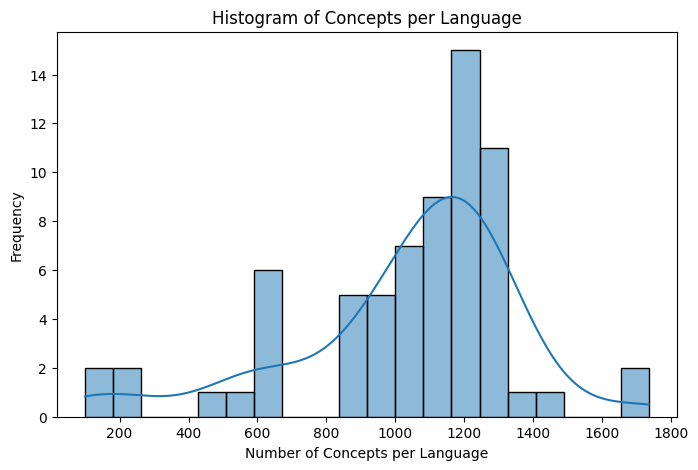

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(language_counts, bins=20, kde=True, edgecolor='black')
plt.xlabel('Number of Concepts per Language')
plt.ylabel('Frequency')
plt.title('Histogram of Concepts per Language')
plt.show()

This is how we can convert the joined data in "thin" format to "wide" format. Note we have to remove duplicates to do so.

In [338]:
joined_data_deduped = joined_data.copy().drop_duplicates(['Concept','Language'])
pivoted_data = joined_data_deduped.pivot(index='Concept', columns='Language', values='Word')

In [340]:
pivoted_data.head()

Language,Abui_Bunggeta,Abui_Kilakawada,Abui_Mobyetang,Abui_Pelman,Agusan_Manobo,Agutaynen,Akeanon,Arta,Ata,Ati,...,Sinama_Sitangkai,Sinama_Tabawan,Tagakaulo,Tagbanwa_Central,Talaandig,Tausug,Tboli,Uab_Meto,Waray,Yakan
Concept,,,,,,,,,,,,,,,,,,,,,
(coral) ree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(coral) reef,koqai,tama wiiy,tama kokai,tama kokai,bahura,NaN,takut,karagtan bunba,NaN,NaN,...,NaN,takot,NaN,ngirito tangkapa,NaN,NaN,botu lemnek,laut,daramo utango,sahasa'
1 person sg.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160 couplets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1pl excl,niidi,niidi,niedi,niedi ~ niadi,sikami,yami,kami,tami,kanami,ikam,...,kitam,kami,kami,kami,sikuy,kami,olon béle tekuy,hai',kami,kami


In [342]:
print(colnames["Abui Mobyetang"])
print(colnames["Mawesdai"])
print(colnames["Ivatan Isabtangan"])

['English', 'Indonesian', 'Abui_Mobyetang', 'Semantic Sphere']
['English', 'Indonesian', 'IPA', 'Mawesdai', 'Semantic field']
['English', 'Tagalog', 'Ivatan_Isabtangen', 'IPA']


## Extracting information about columns

This is a tricky bit! Lets look at what the columns look like:

We see that English is often here, IPA appears in both our choices. The target language appears too, and 'Semantic something' with no consistency.

We will now count everything to see what broader patterns there are. This is done by making a list of all of the values that we see:

In [213]:
values_as_list = []
for sublist in colnames.values():
    values_as_list.extend(sublist)

In [214]:
## If we just want the unique values we can use the python function 'set' which gets rid of duplicates for us.
unique_cols=list(set(values_as_list))

We will now count the number of occurances of each column.

In [217]:
from collections import Counter
# Create a Counter object to count occurrences
counter_obj = Counter(values_as_list)

We expect that each studied language will appear exactly once, whilst IPA and English would ideally be present in every case. Indonesian should be there for every Indonesian language, and we would also expect semantic field information too.

In [218]:
# This is a nice way to present the counts.
for item, count in counter_obj.items():
    if count > 1:
        print(f"{item}: {count}")

English: 66
Indonesian: 34
IPA: 9
Semantic Sphere: 4
ENGLISH ELICITATION NOTES: 6
Tagalog: 50
CEBUANO: 5
Kamayo: 2
Talaandig: 2
Semantic_Field: 22
English elicitation notes: 19
Indonesian elicitation notes: 16
Cebuano: 14
Tagalog Elicitation Notes: 3
Ontology: 3
Ilocano: 11
Local Orthography: 3
Kelon: 2
Sangil: 2


This implies we need to tidy up. Several minor languages appear wtwoce, and we have incomplete IPA and Semantic_Field information. We should however be able to join on the 'English' field.

## Ending: tidying up

Finally, we'll save the most useful of these spreadsheets as new excel files.

In [344]:
## Annoyingly the 'to_excel' function doesn't handle True/False very well, so we'll make a duplicate that contains strings and save those.
englishsheet.replace({True: 'TRUE', False: 'FALSE'}).to_excel("OCSEAN_initial_englishsheet.xlsx")  
collectionsheet.replace({True: 'TRUE', False: 'FALSE'}).to_excel("OCSEAN_initial_collectionsheet.xlsx")

/var/folders/sd/6b6ndf8s69l3glyl3t0xl7zr0000gq/T/ipykernel_90279/2012373909.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  englishsheet.replace({True: 'TRUE', False: 'FALSE'}).to_excel("OCSEAN_initial_englishsheet.xlsx")


In [345]:
joined_data.to_excel("OCSEAN_initial_joineddata.xlsx")

In [346]:
pivoted_data.to_excel("OCSEAN_initial_joineddata_pivoted_derived.xlsx")